# Projet 7 : prédiction de revenues

In [1]:

#import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

#fichier d'ensemble de fonction
import fonctions as f

pd.set_option('display.float_format','{:.3f}'.format)
%matplotlib inline 



In [2]:

#Import des données
data_set_projet7 = pd.read_csv("data/data-projet7.csv")
data_set_population = pd.read_csv("data/population.csv")
data_set_info_pays = pd.read_csv("data/info_pays.csv")


## Nettoyage et préparation des données

In [3]:

data_set_projet7.head(10)


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.898,7297.000
1,ALB,2008,2,100,916.662,7297.000
2,ALB,2008,3,100,1010.916,7297.000
3,ALB,2008,4,100,1086.908,7297.000
4,ALB,2008,5,100,1132.700,7297.000
5,ALB,2008,6,100,1171.141,7297.000
6,ALB,2008,7,100,1201.132,7297.000
7,ALB,2008,8,100,1240.898,7297.000
8,ALB,2008,9,100,1285.691,7297.000
9,ALB,2008,10,100,1325.253,7297.000


In [4]:

data_set_projet7.isna().sum()


country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

In [5]:

data_set_projet7[data_set_projet7['gdpppp'].isna()].head()


,country,year_survey,quantile,nb_quantiles,income,gdpppp
5800,XKX,2008,1,100,437.894,nan
5801,XKX,2008,2,100,508.171,nan
5802,XKX,2008,3,100,591.828,nan
5803,XKX,2008,4,100,668.000,nan
5804,XKX,2008,5,100,730.402,nan


In [6]:

data_set_projet7[data_set_projet7['gdpppp'].isna()].country.unique()


array(['XKX', 'PSE'], dtype=object)

In [7]:

data_set_projet7[data_set_projet7['gdpppp'].isna()].year_survey.unique()


array([2008, 2009])

On remarque des données manquante au niveau du GDP, ici les pays concernés sont : 

XKX = Kosovo

PSE = West Bank and Gaza 

Nous allons essayer de completer ces informations.

In [8]:

#Données issus de la Banque mondial comme les originals
data_set_tempo_dataManquante = pd.read_csv('data/MissingData.csv')


In [9]:

data_set_tempo_dataManquante.columns


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [10]:

#Selection des pays
df_tempo = data_set_tempo_dataManquante[data_set_tempo_dataManquante['Country Code'] == 'XKX']
df_tempo = df_tempo.append(data_set_tempo_dataManquante[data_set_tempo_dataManquante['Country Code'] == 'PSE'])

#Selection des dates pour chaque pays
df_tempo = df_tempo.drop(columns = ['Country Name', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'])

#On prepare les données manquante en ne prenant que l'années manquante pour chacun des pays
df_tempo = df_tempo.reset_index()
df_tempo = df_tempo.drop(columns='index')

df_tempo.loc[1,'gdpppp'] = df_tempo.loc[1,'2009'] 
df_tempo.loc[0,'gdpppp'] = df_tempo.loc[0,'2008']
df_tempo = df_tempo.drop(columns=['2008','2009'])

df_tempo


,Country Code,gdpppp
0,XKX,7236.411
1,PSE,3695.024


In [11]:

#On modifie le dataframe principale avec les données manquante
data_set_projet7.loc[data_set_projet7.country.isin(['XKX']), 'gdpppp'] = df_tempo.loc[0,'gdpppp']
data_set_projet7.loc[data_set_projet7.country.isin(['PSE']), 'gdpppp'] = df_tempo.loc[1,'gdpppp']

data_set_projet7.isna().sum()


country         0
year_survey     0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
dtype: int64

On peut voire qu'il n'y a plus de données manquante.

## Set population

In [12]:

data_set_population.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000,55438.000,56225.000,56695.000,57032.000,57360.000,...,101669.000,102046.000,102560.000,103159.000,103774.000,104341.000,104872.000,105366.000,105845.000,nan
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.000,9169410.000,9351441.000,9543205.000,9744781.000,9956320.000,...,29185507.000,30117413.000,31161376.000,32269589.000,33370794.000,34413603.000,35383128.000,36296400.000,37172386.000,nan
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.000,5531472.000,5608539.000,5679458.000,5735044.000,5770570.000,...,23356246.000,24220661.000,25107931.000,26015780.000,26941779.000,27884381.000,28842484.000,29816748.000,30809762.000,nan
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.000,1659800.000,1711319.000,1762621.000,1814135.000,1864791.000,...,2913021.000,2905195.000,2900401.000,2895092.000,2889104.000,2880703.000,2876101.000,2873457.000,2866376.000,nan
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.000,14375.000,15370.000,16412.000,17469.000,18549.000,...,84449.000,83747.000,82427.000,80774.000,79213.000,78011.000,77297.000,77001.000,77006.000,nan


In [13]:

data_set_population.shape


(264, 64)

In [14]:

data_set_population.columns


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [15]:

data_set_population = data_set_population.drop(columns=['1960', '1961', '1962', '1963',
                                                        '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003','2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'])

data_set_population.isna().sum()


Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2004              1
2005              1
2006              1
2007              1
2008              1
2009              1
2010              1
2011              1
dtype: int64

In [16]:

data_set_population[data_set_population['2004'].isna()]


,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011
108,Not classified,INX,"Population, total",SP.POP.TOTL,nan,nan,nan,nan,nan,nan,nan,nan


Le code pays ici present n'etant pas present dans nos données principale nous n'en aurons pas besoin par la suite.

In [17]:

data_set_population = data_set_population.dropna()


## Set Information complementaire

In [18]:

data_set_info_pays.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,nan
1,AFG,South Asia,Low income,NaN,Afghanistan,nan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,nan
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,nan
4,AND,Europe & Central Asia,High income,NaN,Andorra,nan


In [19]:

data_set_info_pays.shape


(263, 6)

In [20]:

#Colones inutiles pour nous.
data_set_info_pays = data_set_info_pays.drop(columns=['SpecialNotes','Unnamed: 5'])
data_set_info_pays.columns = ['Country Code','Region','Income Groupe', 'Country Name']

data_set_info_pays.isna(). sum()


Country Code      0
Region           46
Income Groupe    46
Country Name      0
dtype: int64

In [21]:

data_set_info_pays[data_set_info_pays["Region"].isna()]


,Country Code,Region,Income Groupe,Country Name
5,ARB,NaN,NaN,Arab World
34,CEB,NaN,NaN,Central Europe and the Baltics
47,CSS,NaN,NaN,Caribbean small states
59,EAP,NaN,NaN,East Asia & Pacific (excluding high income)
60,EAR,NaN,NaN,Early-demographic dividend
61,EAS,NaN,NaN,East Asia & Pacific
62,ECA,NaN,NaN,Europe & Central Asia (excluding high income)
63,ECS,NaN,NaN,Europe & Central Asia
66,EMU,NaN,NaN,Euro area
71,EUU,NaN,NaN,European Union


Les données sont manquante sur ce qui semble etre sur des lignes indicative qui nous ne seront pas utile ici, nous les supprimerons donc

In [22]:

data_set_info_pays = data_set_info_pays.dropna()


In [23]:

data_set_info_pays.shape


(217, 4)

# Preparation

La premiere phase de nettoyage passer nous allons maintenant crée nous dataframe d'etude. 

Nous allons construire deux different, le premier comportera toute les informations des pays tandis que le seconds plus precis sera diviser en different echantillons fiscaux afin de faire une recherche plus precise par pays.

In [24]:

data_set_projet7.head()


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.898,7297.000
1,ALB,2008,2,100,916.662,7297.000
2,ALB,2008,3,100,1010.916,7297.000
3,ALB,2008,4,100,1086.908,7297.000
4,ALB,2008,5,100,1132.700,7297.000


In [25]:

data_set_info_pays.head()


,Country Code,Region,Income Groupe,Country Name
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra


In [26]:

data_set_population.head()


,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,ABW,"Population, total",SP.POP.TOTL,98737.000,100031.000,100834.000,101222.000,101358.000,101455.000,101669.000,102046.000
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,24726684.000,25654277.000,26433049.000,27100536.000,27722276.000,28394813.000,29185507.000,30117413.000
2,Angola,AGO,"Population, total",SP.POP.TOTL,18758145.000,19433602.000,20149901.000,20905363.000,21695634.000,22514281.000,23356246.000,24220661.000
3,Albania,ALB,"Population, total",SP.POP.TOTL,3026939.000,3011487.000,2992547.000,2970017.000,2947314.000,2927519.000,2913021.000,2905195.000
4,Andorra,AND,"Population, total",SP.POP.TOTL,76244.000,78867.000,80993.000,82684.000,83862.000,84463.000,84449.000,83747.000


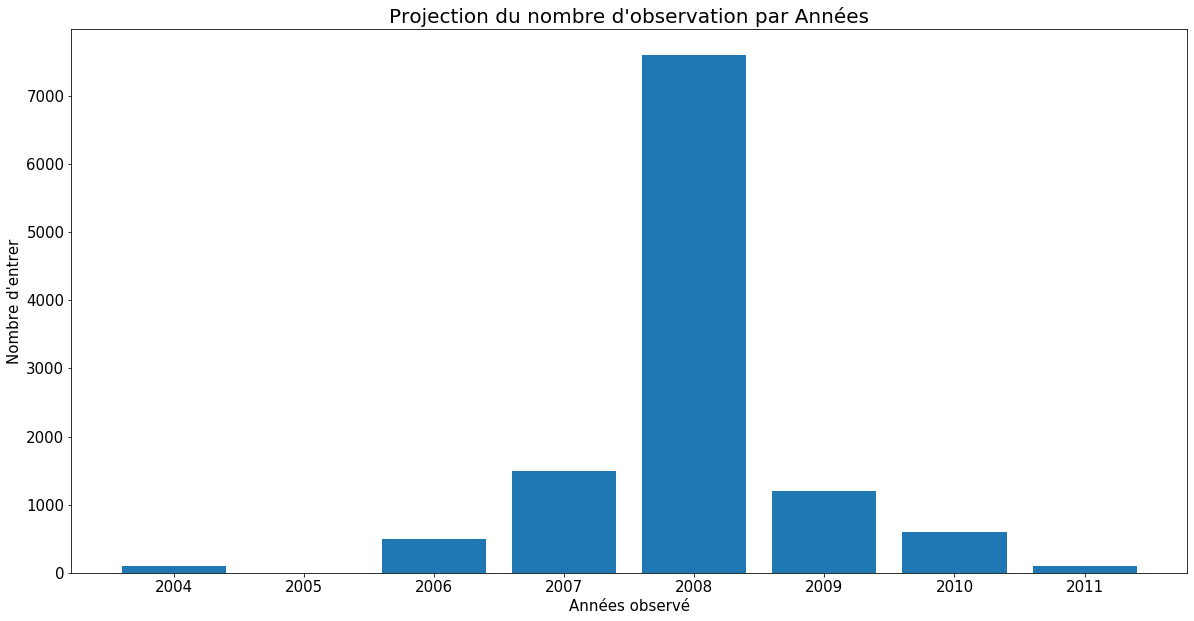

In [27]:

df_tempo = pd.pivot_table(data_set_projet7, index='year_survey', values='country', aggfunc='count')
plt.figure(figsize=(20,10))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Projection du nombre d'observation par Années", fontsize=20)
plt.xlabel("Années observé", fontsize=15)
plt.ylabel("Nombre d'entrer", fontsize=15)
plt.bar(height=df_tempo.country,x=df_tempo.index)
plt.savefig('./ImgFigure/Mn_1.png')

plt.show()


In [28]:

df_tempo


,country
year_survey,
2004,100
2006,500
2007,1500
2008,7599
2009,1200
2010,600
2011,100


La periode la plus propisse a notre etude semble etre 2008, en effet dans cette region nous avons environs 75 pays a etudier, alors que les autres n'en regroupe que quelque uns. Nous nous concentrerons donc sur cette partie pour notre etude.

In [29]:

data_set_projet7 = data_set_projet7.drop(index=data_set_projet7[~data_set_projet7['year_survey'].isin(['2008'])].index)


In [30]:

data_set_population = data_set_population.drop(columns=['Indicator Name', 'Indicator Code',
       '2004', '2005', '2006', '2007', '2009', '2010', '2011'])


Nous allons maintenant verifier que tout nos set est les même pays. Nous prendrons les pays present en prioriter dans le dataframe data_set_projet7, qui est celui que nous utiliserons plus en details par la suite.

In [31]:

countryKepped = data_set_projet7.country.unique()


In [32]:

data_set_population = data_set_population.drop(index = data_set_population[~data_set_population['Country Code'].isin(countryKepped)].index)
data_set_info_pays = data_set_info_pays.drop(index = data_set_info_pays[~data_set_info_pays['Country Code'].isin(countryKepped)].index)

data_set_population = data_set_population.reset_index()
data_set_info_pays = data_set_info_pays.reset_index()
data_set_population = data_set_population.drop(columns='index')
data_set_info_pays = data_set_info_pays.drop(columns='index')


Nos tableau on donc pour le moment un peu changer


In [33]:

data_set_projet7.head()


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.898,7297.000
1,ALB,2008,2,100,916.662,7297.000
2,ALB,2008,3,100,1010.916,7297.000
3,ALB,2008,4,100,1086.908,7297.000
4,ALB,2008,5,100,1132.700,7297.000


In [34]:

data_set_info_pays.head()


,Country Code,Region,Income Groupe,Country Name
0,ALB,Europe & Central Asia,Upper middle income,Albania
1,ARG,Latin America & Caribbean,Upper middle income,Argentina
2,ARM,Europe & Central Asia,Upper middle income,Armenia
3,AUT,Europe & Central Asia,High income,Austria
4,AZE,Europe & Central Asia,Upper middle income,Azerbaijan


In [35]:

data_set_population.head()


,Country Name,Country Code,2008
0,Albania,ALB,2947314.000
1,Argentina,ARG,40080160.000
2,Armenia,ARM,2907618.000
3,Austria,AUT,8321496.000
4,Azerbaijan,AZE,8763400.000


Nous allons a present, mettre en forme nos tableau

In [36]:

data_set_population.columns = ['Country Name','Country Code','Population']

df_final_info = pd.merge(right=data_set_info_pays,
                   left=data_set_population, 
                   right_on = ['Country Name','Country Code'], 
                   left_on = ['Country Name','Country Code'], 
                   how='left')



In [37]:

df_final_info.isna().sum()


Country Name     0
Country Code     0
Population       0
Region           1
Income Groupe    1
dtype: int64

In [38]:

df_final_info.Region.unique()


array(['Europe & Central Asia', 'Latin America & Caribbean',
       'Sub-Saharan Africa', 'North America', nan, 'East Asia & Pacific',
       'Middle East & North Africa', 'South Asia'], dtype=object)

In [39]:

df_final_info[df_final_info.Region == 'Sub-Saharan Africa']


,Country Name,Country Code,Population,Region,Income Groupe
10,Central African Republic,CAF,4273366.000,Sub-Saharan Africa,Low income
13,"Congo, Dem. Rep.",COD,60411195.000,Sub-Saharan Africa,Low income
52,Mozambique,MOZ,22276596.000,Sub-Saharan Africa,Low income
53,Mauritania,MRT,3296238.000,Sub-Saharan Africa,Lower middle income
74,South Africa,ZAF,49779471.000,Sub-Saharan Africa,Upper middle income


In [40]:

df_final_info[df_final_info.Region.isna()]


,Country Name,Country Code,Population,Region,Income Groupe
12,Cote d'Ivoire,CIV,19605569.000,NaN,NaN


In [41]:

df_final_info.loc[12,'Region'] = 'Sub-Saharan Africa'
df_final_info.loc[12,'Income Groupe'] = 'Lower middle income'


Nous avons completez ces donnez grace au information disponible sur le site de la banque mondiale.

In [42]:

#Calcule des indices de gini pour chaque pays. 
for i,row in enumerate(df_final_info.values) :
    tri ='income'

    a = data_set_projet7[data_set_projet7['country'] == row[1]].copy()
    a = a.sort_values(by=tri)
    a = a.reset_index()
    a = a.drop(columns='index')

    df_final_info.loc[i,'Gini'] = f.FctGini(a, tri)
    

Nous allons ajouter une colone pour le salaire moyen par pays

In [43]:

df_incomeMedianreview = data_set_projet7.pivot_table(values=['gdpppp'], index='country', aggfunc=np.median)
df_final_info = pd.merge(right=df_incomeMedianreview, right_on=['country'], left=df_final_info, left_on=['Country Code'], how='left')


In [44]:

df_final_info.columns = ['Country_Name','Country_Code','Population','Region','Income_Groupe','Gini','gdpppp']


In [45]:

df_final_info.head()


,Country_Name,Country_Code,Population,Region,Income_Groupe,Gini,gdpppp
0,Albania,ALB,2947314.000,Europe & Central Asia,Upper middle income,32.141,7297.000
1,Argentina,ARG,40080160.000,Latin America & Caribbean,Upper middle income,46.525,13220.000
2,Armenia,ARM,2907618.000,Europe & Central Asia,Upper middle income,28.030,5611.000
3,Austria,AUT,8321496.000,Europe & Central Asia,High income,29.533,36193.000
4,Azerbaijan,AZE,8763400.000,Europe & Central Asia,Upper middle income,32.903,8101.000


In [46]:

data_set_projet7.head()


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.898,7297.000
1,ALB,2008,2,100,916.662,7297.000
2,ALB,2008,3,100,1010.916,7297.000
3,ALB,2008,4,100,1086.908,7297.000
4,ALB,2008,5,100,1132.700,7297.000


In [47]:

#Nous avons exporté nos données pour pouvoir les réutiliser.
df_final_info.to_csv('data/clean/set_infoGeneral.csv',index=False)
data_set_projet7.to_csv('data/clean/set_dataProjet7.csv',index=False)


# Mission 1

Durant cette mission nous allons explorer les deux dataframe afin de trouver des information qui pourrait etre interressante.

Nous allons dans un premier temps résumez les données utilisées en repondant a des questions comme :

    Année(s) des données utilisées
    Nombre de pays présents
    Population couverte par l'analyse (en termes de pourcentage de la population mondiale)

Nous allons par la suite debattre rapidement de la forme des données precise de chaque pays par le biais ici aussi de quelque petit question comme, 

    De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?
    Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

_Nous appellerons ici chaque quantile une classe de revenu.
Ainsi, la valeur de la colonne income pour un quantile donné peut être vu comme le revenu moyen des personnes appartenant à la classe de revenu correspondante à ce quantile._

L'unité utilisée dans la colonne income de la world income distribution est le $PPP. Nous expliquerons brievement comment cette dernier fonctionne.

In [48]:

df_projet7 = pd.read_csv("data/clean/set_dataProjet7.csv")
df_info = pd.read_csv("data/clean/set_infoGeneral.csv")


In [49]:

df_projet7.year_survey.unique()


array([2008])

In [50]:

len(df_projet7.country.unique())


76


D'apres la world bank (https://donnees.banquemondiale.org/indicateur/sp.pop.totl?end=2018&start=2008) la population mondiale en 2008 etait de 6,758 milliard de personnes.


In [51]:

population_etudier = df_info.Population.sum()

population_total = 6758000000

pourcentage_etudier = ( population_etudier * 100 ) / population_total
pourcentage_etudier.round(3)


34.098

Réponse au questions :

Nous allons ici étudier 76 pays differents, durant l'années de 2008. 
Nous etudions donc ici environs 34% de la populaiton mondiale de 2008



In [52]:

df_projet7.head()


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.898,7297.000
1,ALB,2008,2,100,916.662,7297.000
2,ALB,2008,3,100,1010.916,7297.000
3,ALB,2008,4,100,1086.908,7297.000
4,ALB,2008,5,100,1132.700,7297.000



Purchasing Power Parity (PPP) ou Parité de Pouvoir d'Achat (PPA en français) est un taux de conversion monétaire qui permet d'exprimer dans une unité comune les pouvoirs d'achats des differentes monnaies. Ce taux exprime le rapport entre la quantité d'unités monétaire nécessaire dans des pays differents pour ce procurer un panier équivalement de biens et services.

exemple le prix de ce panier est de 7 297 $ppp en Albanie

Dans notre tableau les incomes des pays sont representer en centilles qui represente chacun une classe de revenu, partager les incomes de cette facon ce revelle assez pertinant dans notre cas, ainsi lorsque nous etudirons les pays nous pourrons nous concentrer sur les niveau fiscaux qui sont les plus interressant pour notre mission. 

De maniere generale cette disposition permet d'avoire une etude plus precise des pays. 

Continuons notre etude

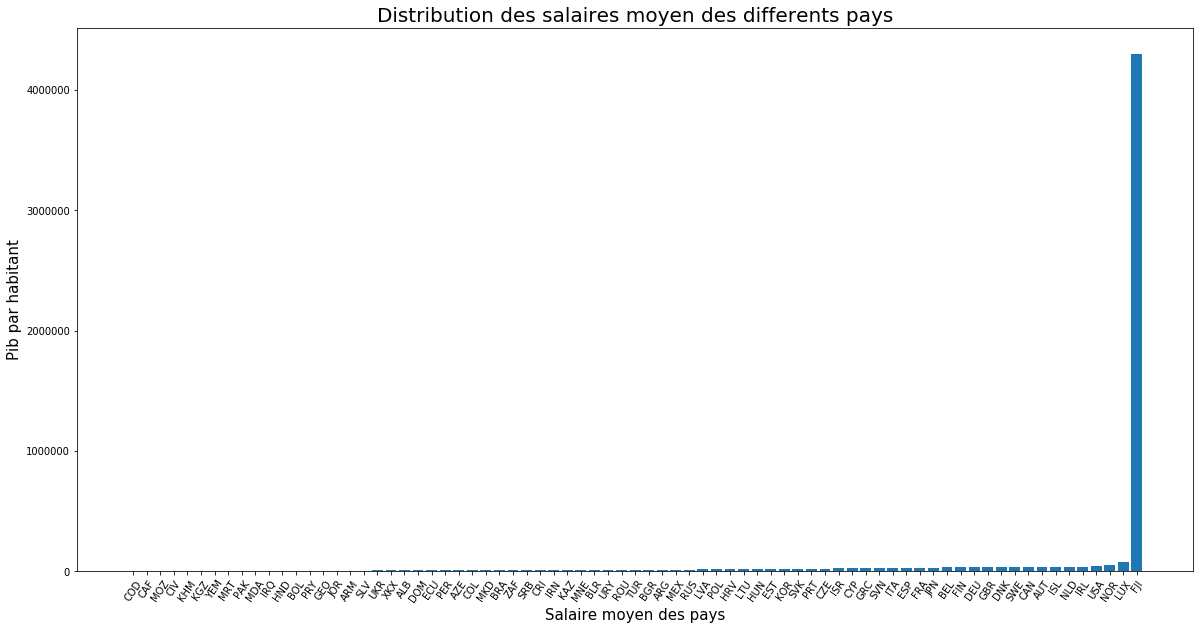

In [53]:

plt.figure(figsize=(20,10))
plt.bar(data=df_info.sort_values(by='gdpppp'), x ='Country_Code', height ='gdpppp')
plt.xticks(rotation = 55)
plt.xlabel('Salaire moyen des pays',fontsize=15)
plt.ylabel('Pib par habitant',fontsize=15)
plt.title('Distribution des salaires moyen des differents pays', fontsize=20)
plt.savefig('./ImgFigure/M1_1.png')

plt.show()




In [54]:

df_info.sort_values(by='gdpppp', ascending=False).head(5)


,Country_Name,Country_Code,Population,Region,Income_Groupe,Gini,gdpppp
25,Fiji,FJI,845361.000,East Asia & Pacific,Upper middle income,44.378,4300332.000
46,Luxembourg,LUX,488650.000,Europe & Central Asia,High income,30.984,73127.000
55,Norway,NOR,4768212.000,Europe & Central Asia,High income,28.015,49070.000
71,United States,USA,304093966.000,North America,High income,44.733,43261.000
33,Ireland,IRL,4489544.000,Europe & Central Asia,High income,32.024,39268.000


Ce pays semble vraiment etre a part, regardons y d'un peut plus pres


In [55]:

df_projet7[df_projet7.country == 'FJI'].describe()


,year_survey,quantile,nb_quantiles,income,gdpppp
count,100.000,100.000,100.000,100.000,100.000
mean,2008.000,50.500,100.000,2098.731,4300332.000
std,0.000,29.011,0.000,2520.684,0.000
min,2008.000,1.000,100.000,308.173,4300332.000
25%,2008.000,25.750,100.000,969.867,4300332.000
50%,2008.000,50.500,100.000,1452.793,4300332.000
75%,2008.000,75.250,100.000,2321.310,4300332.000
max,2008.000,100.000,100.000,22161.590,4300332.000


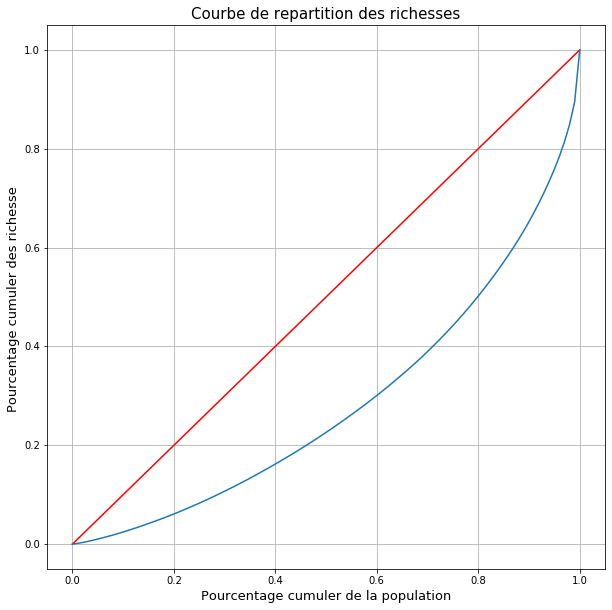

In [56]:

c = df_projet7[df_projet7.country == 'FJI'].copy()
c = c.sort_values(by='income')
c = c.reset_index()
c = c.drop(columns='index')


dep = c['income'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(10,10))
plt.plot([0.0, 1.0],color='red')
plt.plot(np.linspace(0,1,len(lorenz)),lorenz)

plt.title('Courbe de repartition des richesses', fontsize=15)
plt.ylabel('Pourcentage cumuler des richesse ', fontsize=13)
plt.xlabel('Pourcentage cumuler de la population', fontsize=13)
plt.grid(True)
plt.savefig('./ImgFigure/M1_2.png')

plt.show()


In [57]:

df_info[df_info['Country_Code'] == 'FJI']


,Country_Name,Country_Code,Population,Region,Income_Groupe,Gini,gdpppp
25,Fiji,FJI,845361.000,East Asia & Pacific,Upper middle income,44.378,4300332.000


In [58]:

df_projet7[df_projet7.country == 'FJI'].income.sum()


209873.08823000002

Au vue des données dont nous disposont sur les ïles fiji dans nos dataframe, nous pouvons considere que la valeur qui leur est attacher pour le gdp est plutot aberrante, en effet avec les incomes totale du pays que nous avons si dessus, il n'est pas possible que le gdp soit si elevé 

In [59]:

df_info = df_info.drop(df_info[df_info['Country_Code'] == 'FJI'].index)
df_projet7 = df_projet7.drop(df_projet7[df_projet7['country'] == 'FJI'].index)


# Analyse univarié

In [60]:
df_info.head()

,Country_Name,Country_Code,Population,Region,Income_Groupe,Gini,gdpppp
0,Albania,ALB,2947314.000,Europe & Central Asia,Upper middle income,32.141,7297.000
1,Argentina,ARG,40080160.000,Latin America & Caribbean,Upper middle income,46.525,13220.000
2,Armenia,ARM,2907618.000,Europe & Central Asia,Upper middle income,28.030,5611.000
3,Austria,AUT,8321496.000,Europe & Central Asia,High income,29.533,36193.000
4,Azerbaijan,AZE,8763400.000,Europe & Central Asia,Upper middle income,32.903,8101.000


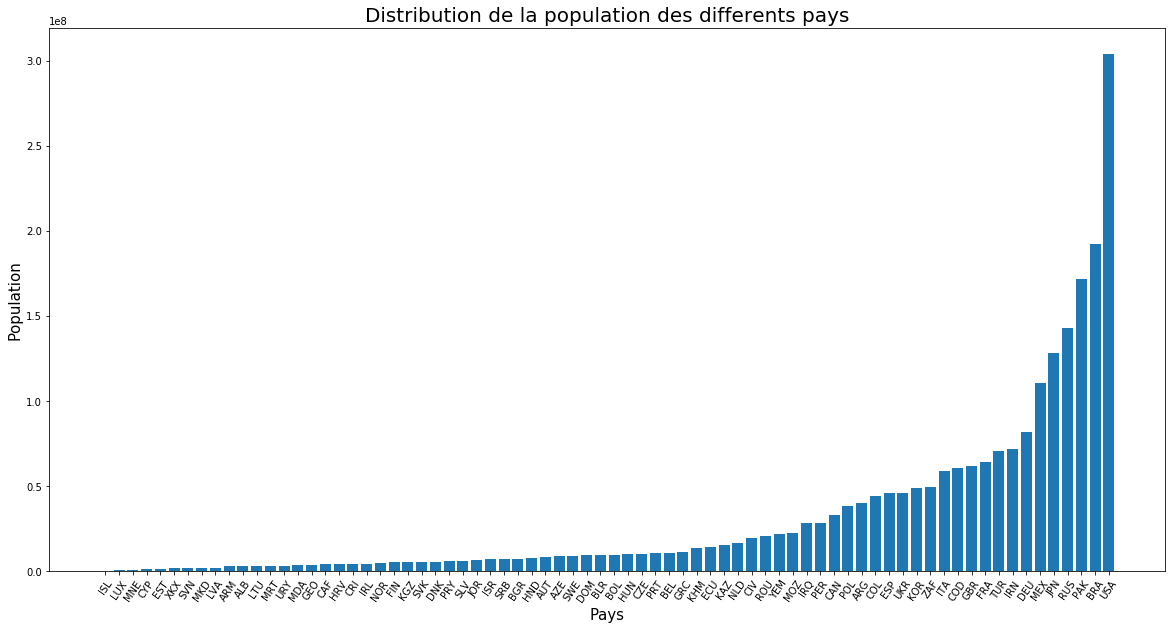

In [61]:

plt.figure(figsize=(20,10))
plt.bar(data=df_info.sort_values(by='Population'), x ='Country_Code', height ='Population')
plt.xticks(rotation = 55)
plt.xlabel('Pays', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Distribution de la population des differents pays', fontsize=20)
plt.savefig('./ImgFigure/M1_3.png')

plt.show()


In [62]:

varTempoMean = df_info.Population.mean()
varTempoMedian = df_info.Population.median()
varTempoEcarttype = df_info.Population.std()
varTempoVariance = df_info.Population.var()

print(" Moyen: {}, Medianne: {}, Ecart type: {}, Variance: {}".format(varTempoMean,varTempoMedian, varTempoEcarttype, varTempoVariance))


 Moyen: 31128000.891891893, Medianne: 9624719.5, Ecart type: 50942521.996261805, Variance: 2595140547339617.5


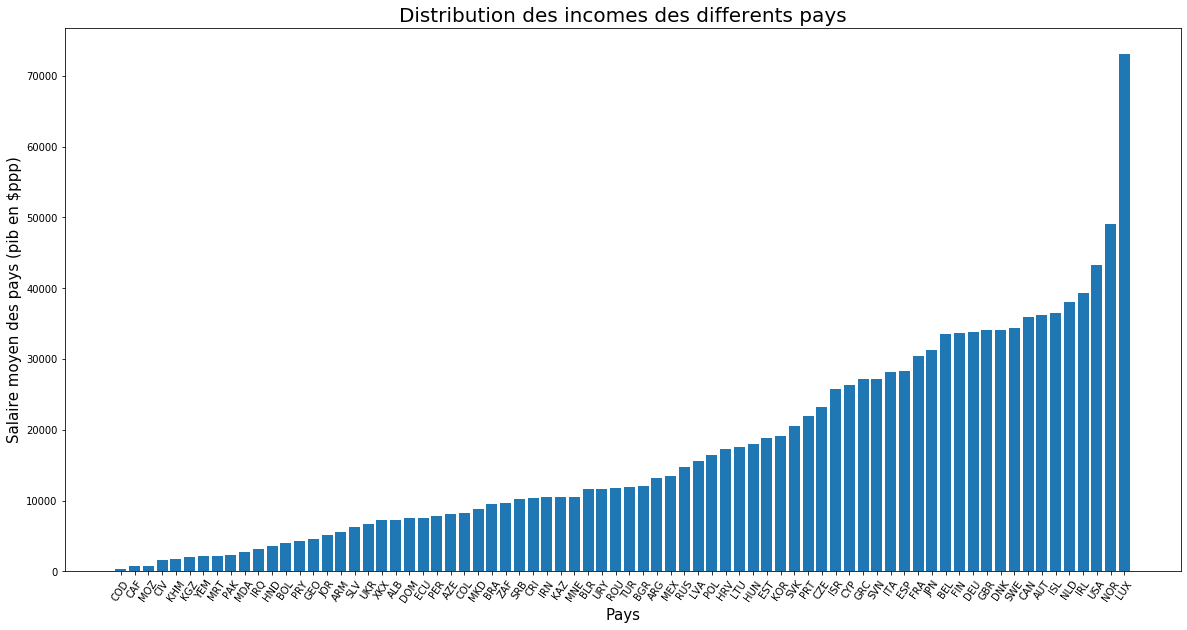

In [63]:

plt.figure(figsize=(20,10))
plt.bar(data=df_info.sort_values(by='gdpppp'), x ='Country_Code', height ='gdpppp')
plt.xticks(rotation = 55)
plt.ylabel('Salaire moyen des pays (pib en $ppp)',fontsize=15)
plt.xlabel('Pays',fontsize=15)
plt.title('Distribution des incomes des differents pays', fontsize=20)
plt.savefig('./ImgFigure/M1_4.png')

plt.show()


In [64]:

varTempoMean = df_info.gdpppp.mean()
varTempoMedian = df_info.gdpppp.median()
varTempoEcarttype = df_info.gdpppp.std()
varTempoVariance = df_info.gdpppp.var()

print(" Moyen: {}, Medianne: {}, Ecart type: {}, Variance: {}".format(varTempoMean,varTempoMedian, varTempoEcarttype, varTempoVariance))


 Moyen: 17054.922571553165, Medianne: 11843.0, Ecart type: 14142.09721047386, Variance: 199998913.5104925


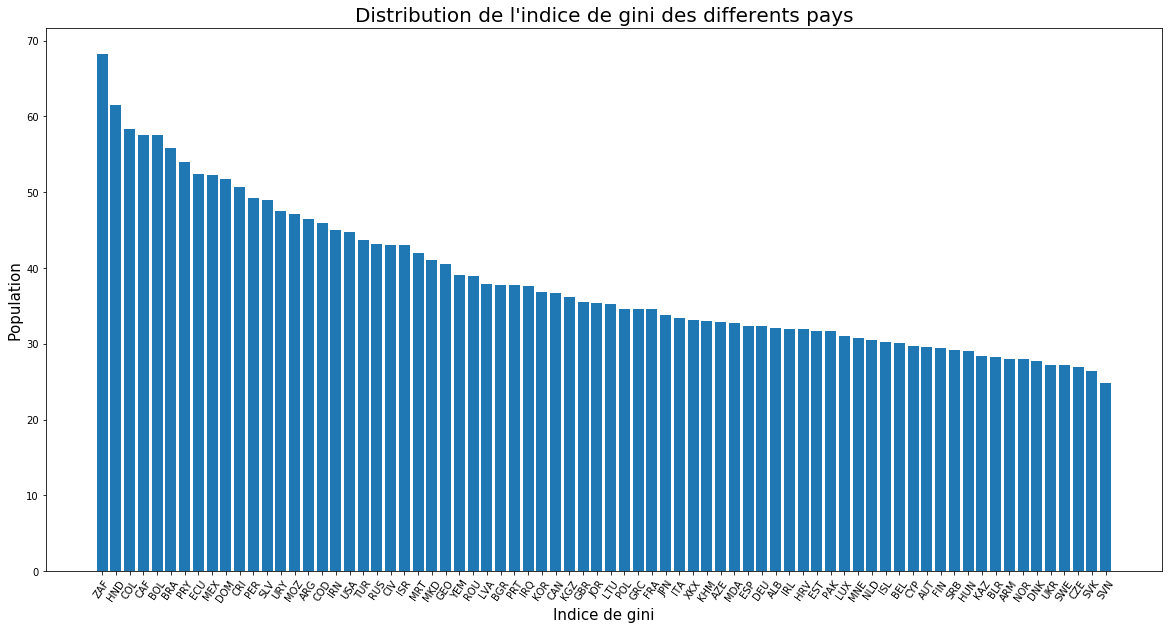

In [65]:

plt.figure(figsize=(20,10))
plt.bar(data=df_info.sort_values(by='Gini',ascending=False), x ='Country_Code', height ='Gini')
plt.xticks(rotation = 55)
plt.xlabel('Indice de gini',fontsize=15)
plt.ylabel('Population',fontsize=15)
plt.title("Distribution de l'indice de gini des differents pays", fontsize=20)
plt.savefig('./ImgFigure/M1_6.png')

plt.show()


In [66]:

varTempoMean = df_info.Gini.mean()
varTempoMedian = df_info.Gini.median()
varTempoEcarttype = df_info.Gini.std()
varTempoVariance = df_info.Gini.var()

print(" Moyen: {}, Medianne: {}, Ecart type: {}, Variance: {}".format(varTempoMean,varTempoMedian, varTempoEcarttype, varTempoVariance))


 Moyen: 38.34194493962743, Medianne: 35.33081184819618, Ecart type: 9.815776904626569, Variance: 96.34947624140035


In [67]:

df_info['Income_Groupe'].value_counts()


High income            33
Upper middle income    27
Lower middle income    10
Low income              4
Name: Income_Groupe, dtype: int64

In [68]:

df_info.Region.value_counts()


Europe & Central Asia         44
Latin America & Caribbean     13
Sub-Saharan Africa             6
Middle East & North Africa     5
East Asia & Pacific            3
North America                  2
South Asia                     1
Name: Region, dtype: int64

# Analyse bivarié 

Avancons dans l'analyse de variable en fonction d'autre.

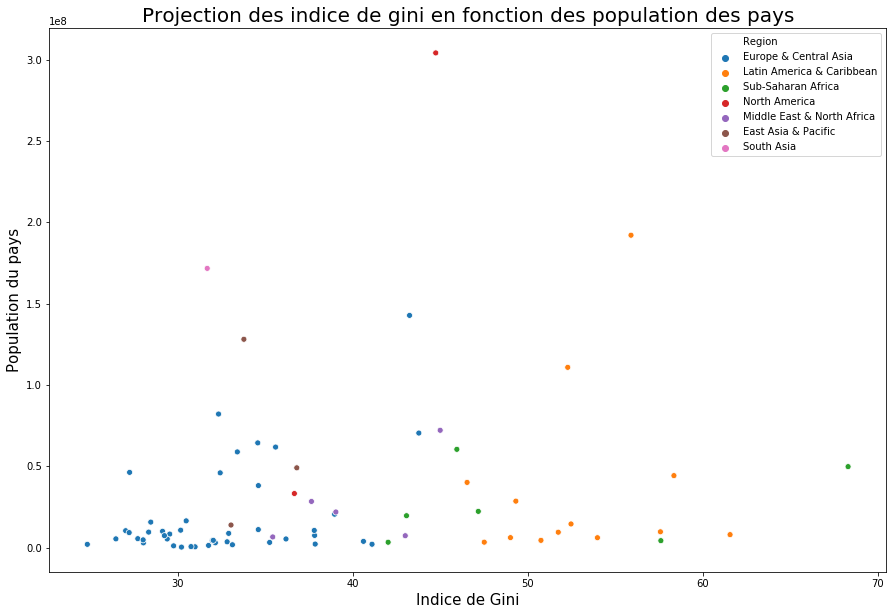

In [69]:

X = 'Gini'
Y = 'Population'
d = df_info

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
ax = sns.scatterplot(x=X, y=Y, data=d, hue='Region')

plt.xlabel('Indice de Gini',fontsize=15)
plt.ylabel('Population du pays',fontsize=15)
plt.title("Projection des indice de gini en fonction des population des pays",fontsize=20)
plt.grid(False)
plt.savefig('./ImgFigure/M1_7.png')

plt.show()



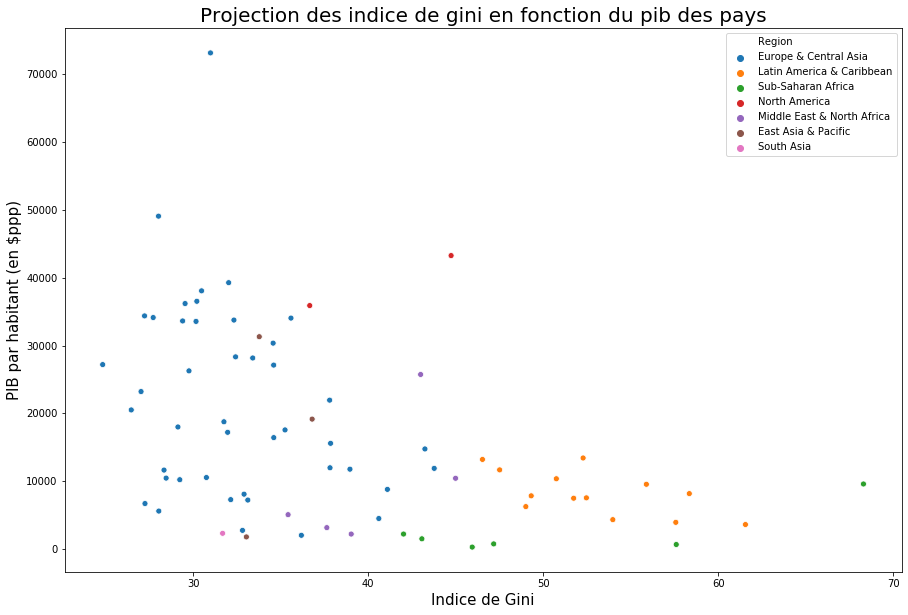

In [70]:

X = 'Gini'
Y = 'gdpppp'
d = df_info

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
ax = sns.scatterplot(x=X, y=Y, data=d, hue='Region')

plt.xlabel('Indice de Gini',fontsize=15)
plt.ylabel('PIB par habitant (en $ppp)',fontsize=15)
plt.title("Projection des indice de gini en fonction du pib des pays",fontsize=20)
plt.grid(False)
plt.savefig('./ImgFigure/M1_8.png')

plt.show()


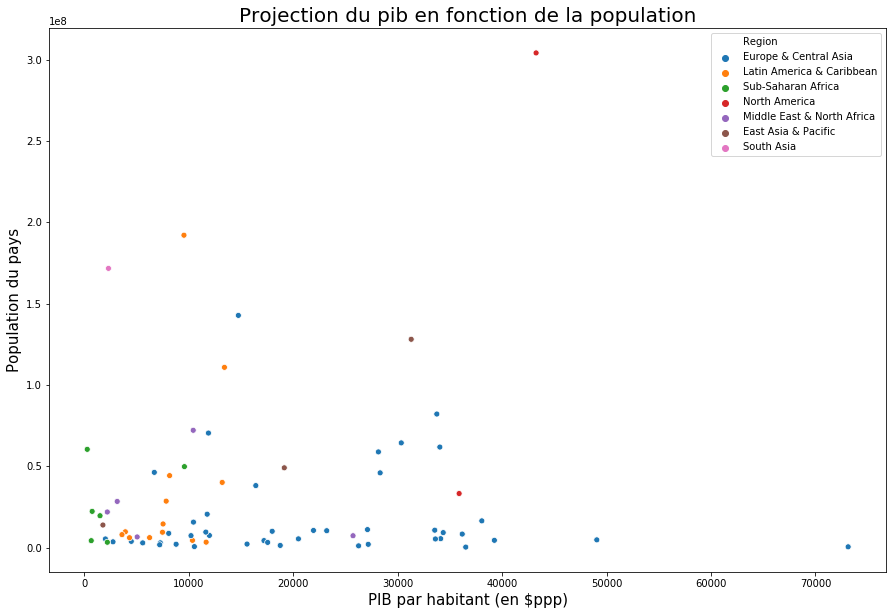

In [71]:

X = 'gdpppp'
Y = 'Population'
d = df_info

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
ax = sns.scatterplot(x=X, y=Y, data=d, hue='Region')

plt.xlabel('PIB par habitant (en $ppp)',fontsize=15)
plt.ylabel('Population du pays',fontsize=15)
plt.title("Projection du pib en fonction de la population",fontsize=20)
plt.grid(False)
plt.savefig('./ImgFigure/M1_10.png')

plt.show()


On peut clairement voire la relation qui existe entre ces duex parametre, relation souligner par la droite rouge.

In [72]:

#Export des données pour pouvoir les reutilisées
df_info.to_csv('data/clean/set_infoGeneral.csv',index=False)
df_projet7.to_csv('data/clean/set_dataProjet7.csv',index=False)


# Projet 7 Mission 2


    Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.

    Représentez la courbe de Lorenz de chacun des pays choisis.
    
    Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
    
    Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?


In [73]:

#Import des données
df_projet7 = pd.read_csv("data/clean/set_dataProjet7.csv")
df_info = pd.read_csv("data/clean/set_infoGeneral.csv")


In [74]:

df_projet7.head()


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.898,7297.000
1,ALB,2008,2,100,916.662,7297.000
2,ALB,2008,3,100,1010.916,7297.000
3,ALB,2008,4,100,1086.908,7297.000
4,ALB,2008,5,100,1132.700,7297.000


In [75]:

df_info.head()


,Country_Name,Country_Code,Population,Region,Income_Groupe,Gini,gdpppp
0,Albania,ALB,2947314.000,Europe & Central Asia,Upper middle income,32.141,7297.000
1,Argentina,ARG,40080160.000,Latin America & Caribbean,Upper middle income,46.525,13220.000
2,Armenia,ARM,2907618.000,Europe & Central Asia,Upper middle income,28.030,5611.000
3,Austria,AUT,8321496.000,Europe & Central Asia,High income,29.533,36193.000
4,Azerbaijan,AZE,8763400.000,Europe & Central Asia,Upper middle income,32.903,8101.000


In [76]:

#On prend des pays aléatoirement
listPays = ['ARG','ZAF','PER','CIV','ISL','USA','FRA','ALB']

df_PaysSelectionne = pd.DataFrame(df_projet7[df_projet7['country'].isin(listPays)])


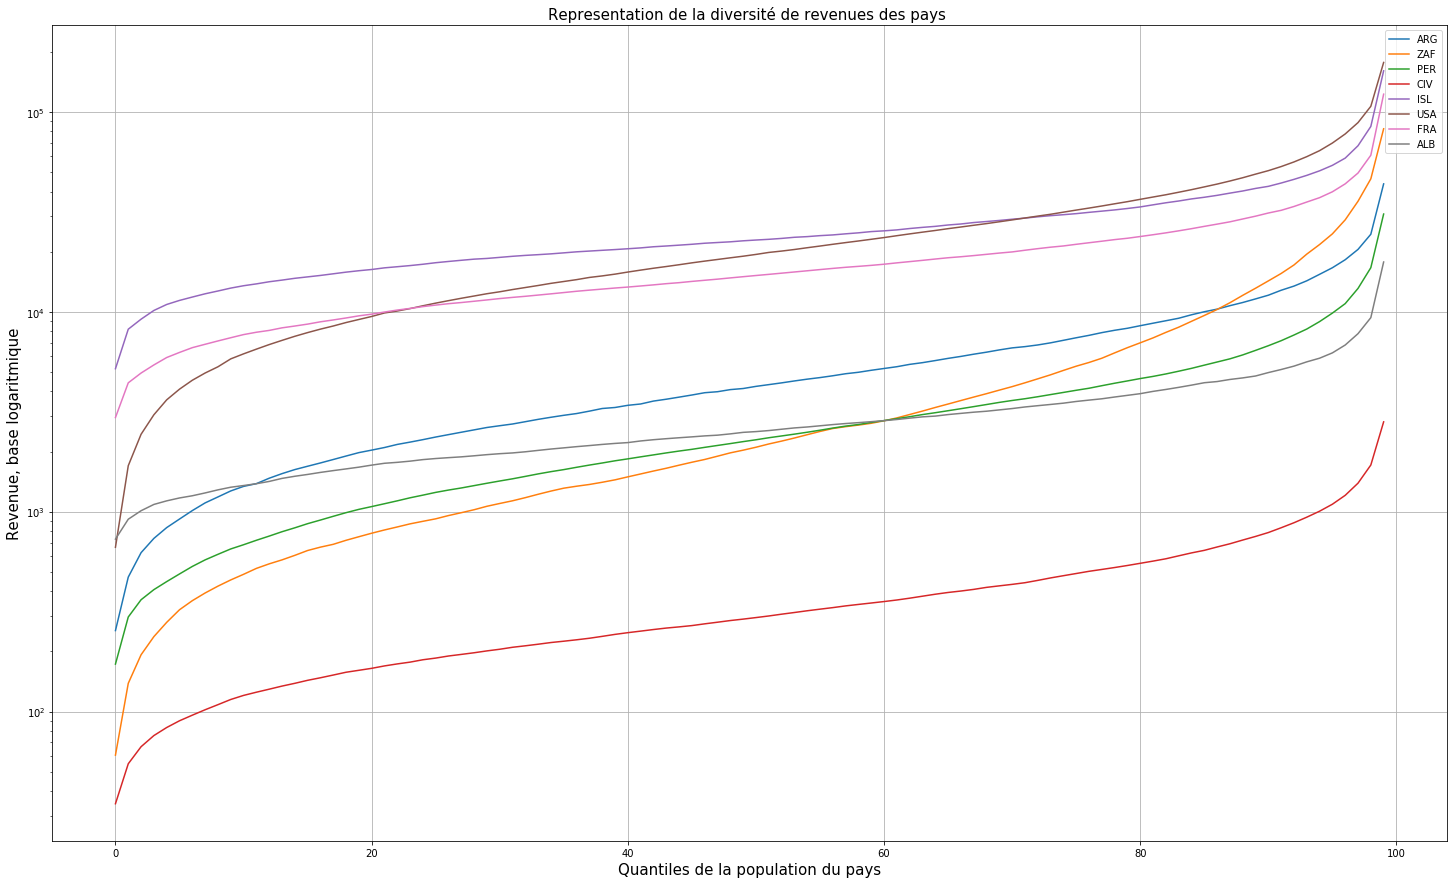

In [77]:

plt.figure(figsize=(25,15))

for i in listPays:
    pays = i
    df_temp = df_PaysSelectionne[df_PaysSelectionne['country'] == pays ].copy()
    df_temp = df_temp.reset_index()
    df_temp.drop(columns='index')
    plt.plot(df_temp.income, label = pays)
    
plt.legend()
plt.title('Representation de la diversité de revenues des pays ',fontsize=15)
plt.xlabel('Quantiles de la population du pays',fontsize=15)
plt.ylabel('Revenue, base logaritmique', fontsize=15)
plt.yscale('log')
plt.grid(True)
plt.savefig('./ImgFigure/M2_1.png')
plt.show()
    

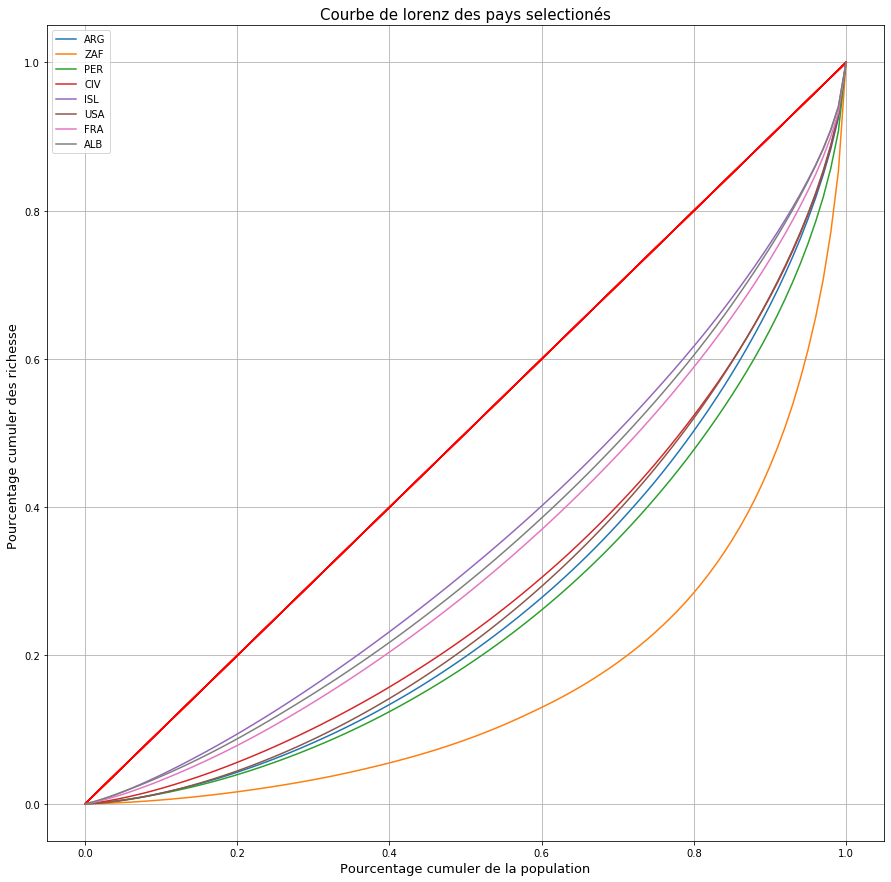

In [78]:

# Courbe de lorenz des pays selectionnés

plt.figure(figsize=(15,15))

data = df_PaysSelectionne

for i in listPays:
    pays = i
    df_tempo = data[data.country == pays].copy()
    df_tempo = df_tempo.sort_values(by='income')
    df_tempo = df_tempo.reset_index()
    df_tempo = df_tempo.drop(columns='index')


    dep = df_tempo['income'].values
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

    plt.plot([0.0, 1.0],color='red')
    plt.plot(np.linspace(0,1,len(lorenz)),lorenz, label=pays)

plt.title('Courbe de lorenz des pays selectionés', fontsize=15)
plt.ylabel('Pourcentage cumuler des richesse ', fontsize=13)
plt.xlabel('Pourcentage cumuler de la population', fontsize=13)
plt.legend()
plt.grid(True)
plt.savefig('./ImgFigure/M2_2.png')

plt.show()


Evolution de l'indice de gini, comme nous ne pocedons pas ces information nous les avons recuperer sur le site de la banque mondial. Nous allons prendre que les années que nous avions de base jusqu'a 2008 l'année de notre etude soit 2004,2005,2006,2007,2008


In [79]:

data_set_Gini = pd.read_csv("data/GiniEvolution.csv")
# data_set_Gini = data_set_Gini.fillna(0)

#Preparation des données pour la projection
data_set_Gini.index = data_set_Gini['Country Code']
data_set_Gini = data_set_Gini.drop(columns=['Country Name','Country Code'])
data_set_Gini = data_set_Gini.T


In [80]:

data_set_Gini[listPays]


Country Code,ARG,ZAF,PER,CIV,ISL,USA,FRA,ALB
2004,48.600,nan,49.900,nan,28.000,40.500,30.600,nan
2005,48.000,64.800,50.400,nan,29.000,nan,29.800,30.600
2006,46.700,nan,50.300,nan,30.200,nan,29.700,nan
2007,46.600,nan,50.000,nan,29.500,41.100,32.400,nan
2008,45.300,63.000,47.500,43.200,31.800,nan,33.000,30.000


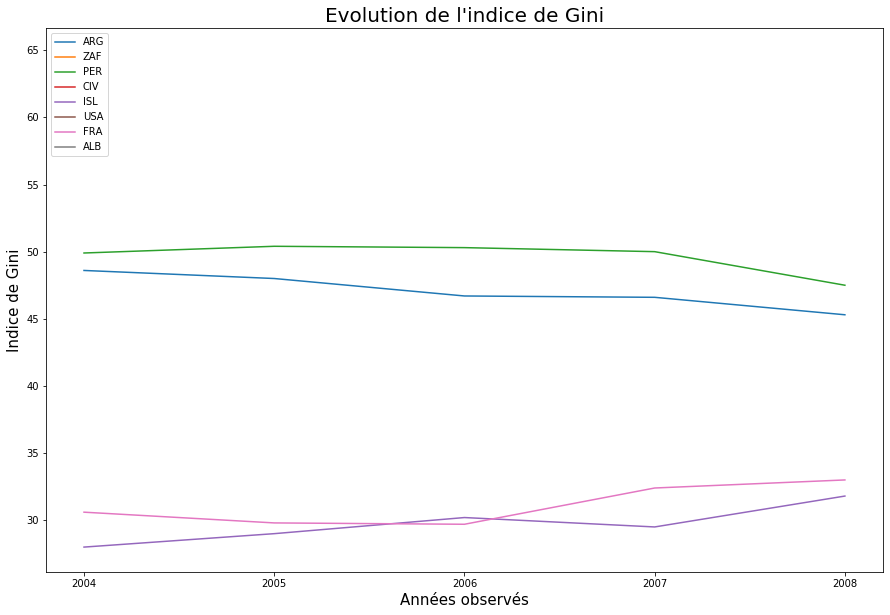

In [81]:

#Projection de l'evolution de l'indice de Gini
plt.figure(figsize=(15,10))
plt.plot(data_set_Gini[listPays])
plt.legend(data_set_Gini[listPays].columns)
plt.title("Evolution de l'indice de Gini",fontsize = 20)
plt.xlabel("Années observés",fontsize = 15)
plt.ylabel("Indice de Gini",fontsize = 15)
plt.savefig('./ImgFigure/M2_3.png')
plt.show()


Comme on peut le voire il nous manque plustot pas mal de données au niveau de la banque mondiale pour les indices de gini, ces une des raisons pour lequels nous avons decider de les recaluler pour notre projets.

In [82]:

df_classerGini = df_info.sort_values(by='Gini').reset_index()
df_classerGini = df_classerGini.drop(columns='index')

#Moyenne des indices de gini
df_classerGini.Gini.mean()


38.34194493962743

In [83]:

df_classerGini.head(5)


,Country_Name,Country_Code,Population,Region,Income_Groupe,Gini,gdpppp
0,Slovenia,SVN,2021316.000,Europe & Central Asia,High income,24.825,27197.000
1,Slovak Republic,SVK,5379233.000,Europe & Central Asia,High income,26.457,20515.000
2,Czech Republic,CZE,10384603.000,Europe & Central Asia,High income,27.016,23223.000
3,Sweden,SWE,9219637.000,Europe & Central Asia,High income,27.217,34371.000
4,Ukraine,UKR,46258200.000,Europe & Central Asia,Lower middle income,27.242,6721.000


In [84]:

df_classerGini.tail(5)


,Country_Name,Country_Code,Population,Region,Income_Groupe,Gini,gdpppp
69,Bolivia,BOL,9721454.000,Latin America & Caribbean,Lower middle income,57.572,3950.000
70,Central African Republic,CAF,4273366.000,Sub-Saharan Africa,Low income,57.597,685.000
71,Colombia,COL,44254975.000,Latin America & Caribbean,Upper middle income,58.344,8185.000
72,Honduras,HND,7980955.000,Latin America & Caribbean,Lower middle income,61.551,3628.000
73,South Africa,ZAF,49779471.000,Sub-Saharan Africa,Upper middle income,68.295,9602.000


In [85]:

df_classerGini[df_classerGini['Country_Code'] == 'FRA']


,Country_Name,Country_Code,Population,Region,Income_Groupe,Gini,gdpppp
33,France,FRA,64374984.000,Europe & Central Asia,High income,34.564,30357.000


La France est donc 34ieme dans le classements

Les Mission 3 et 4 sont dans les fichiers suivant 